# Frontière de décision

Une autre manière de penser à la classification est de découper l'espace des caractéristiques en régions, de sorte que tous les points d'une région donnée soient destinés à recevoir la même étiquette. 

Les régions sont définies par leurs limites, c'est pourquoi nous voulons que la régression trouve des lignes de séparation au lieu d'un ajustement. La figure ci-dessous montre comment des exemples d'apprentissage de la classification binaire peuvent être considérés comme des points colorés dans l'espace de caractéristiques. Notre classification  repose sur la cohérence régionale entre les points. Cela signifie que les points proches ont tendance à avoir des étiquettes similaires.

Idéalement, nos deux classes seront bien séparées dans l'espace de caractéristiques, de sorte qu'une ligne puisse facilement les séparer. Mais plus généralement, il y aura des aberrations. Nous devons juger notre classificateur par la "pureté" de la séparation qui en résulte, en pénalisant la mauvaise classification des points qui se trouvent du mauvais côté de la ligne.

Tout ensemble de points peut être parfaitement partitionné, si nous concevons une frontière suffisamment compliquée qui fait des zig-zag pour capturer toutes les instances avec une étiquette donnée. Des séparateurs aussi compliqués sont généralement le reflet d'un surapprentissage de l'ensemble d'entraînement. Les séparateurs linéaires offrent la vertu de simplicité et de robustesse et, comme nous le verrons, peuvent être efficacement construits en utilisant la régression logistique.

Illutrons cela avec les données de l'iris. Il s'agit d'un ensemble de données célèbre qui contient la longueur et la largeur des sépales et des pétales de 150 fleurs d'iris de trois espèces différentes : Iris-Setosa, Iris-Versicolor, et Iris-Virginica

In [3]:
np.random.seed(6100)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

In [7]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names,index=pd.Index([i for i in range(iris.data.shape[0])])).join(pd.DataFrame(iris.target, columns=pd.Index(["species"]), index=pd.Index([i for i in range(iris.target.shape[0])])))
iris_df.species.replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'}, inplace=True)
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [8]:
iris_df.tail()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica

In [9]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

Essayons de construire un classificateur pour détecter le type Iris-Virginica en se basant uniquement sur la caractéristique de la largeur des pétales. 

In [10]:
X = iris["data"][:, 3:]  # largeur des pétales
y = (iris["target"] == 2).astype(np.int)  # 1 si Iris-Virginica, sinon 0

In [11]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [24]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

In [27]:
decision_boundary

array([1.61561562])

La largeur des pétales des fleurs d'Iris-Virginica (représentées par des triangles) varie de 1,4 cm à 2,5 cm, tandis que les autres fleurs d'iris (représentées par des carrés) ont généralement une largeur de pétale plus petite, allant de 0,1 cm à 1,8 cm. 

Remarquez qu'il y a un peu de chevauchement. Au-dessus d'environ 2 cm, le classificateur est très confiant que la fleur est un Iris-Virginica (il émet une forte probabilité pour cette classe), tandis qu'en dessous de 1 cm, il est très confiant qu'il ne s'agit pas d'un Iris-Virginica (forte probabilité pour la classe "Not Iris-Virginica"). 

Entre ces deux extrêmes, le classificateur n'est pas sûr. Cependant, si vous lui demandez de prédire la classe (en utilisant la méthode predict() plutôt que la méthode predict_proba()), il vous retournera la classe la plus probable. Par conséquent, il existe une limite de décision à environ 1,6 cm où les deux probabilités sont égales à 50 % : si la largeur du pétale est supérieure à 1,6 cm, le classificateur prédira que la fleur est un Iris- Virginica, ou bien il prédira qu'elle ne l'est pas (même s'il n'est pas très sûr) :

In [1]:
 log_reg.predict([[1.7], [1.5]])

NameError: name 'log_reg' is not defined

/Users/nourmp/anaconda3/envs/vbook4/lib/python3.7/site-packages/matplotlib/patches.py:1306: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


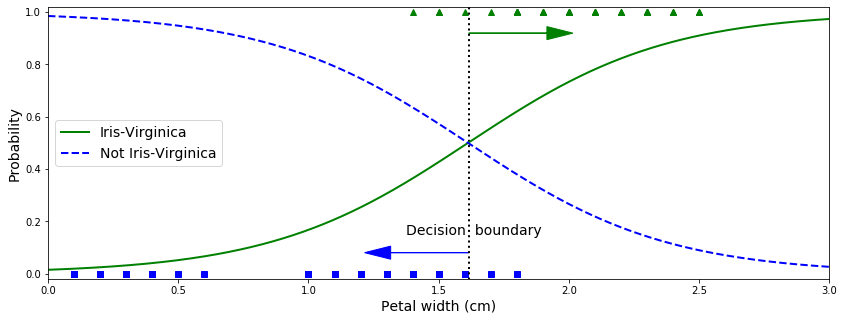

In [23]:
plt.figure(figsize=(14, 5))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

La figure ci-dessous montre le même ensemble de données, mais cette fois-ci avec deux caractéristiques : la largeur et la longueur des pétales. Une fois entrainé, le classificateur de régression logistique peut estimer la probabilité qu'une nouvelle fleur soit une Iris-Virginica en se basant sur ces deux caractéristiques.

La ligne pointillée représente les points où le modèle estime une probabilité de 50% : c'est la limite de décision du modèle. Chaque ligne parallèle représente les points où le modèle produit une probabilité spécifique, de 15% (en bas à gauche) à 90% (en haut à droite). Toutes les fleurs au-delà de la ligne en haut à droite ont plus de 90 % de chances d'être Iris-Virginica selon le modèle.

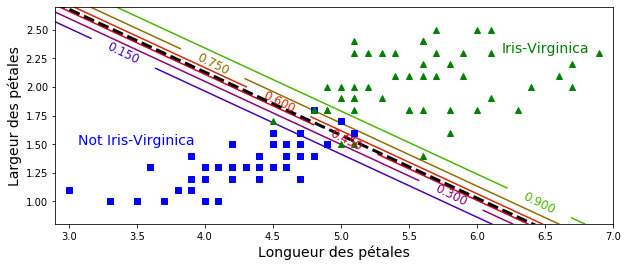

In [10]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Longueur des pétales", fontsize=14)
plt.ylabel("Largeur des pétales", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

Tout comme les autres modèles linéaires, les modèles de régression logistique peuvent être régularisés à l'aide de pénalités $\ell_1$ ou $\ell_2$. Scitkit-Learn ajoute en fait une pénalité de $\ell_2$ par défaut.

L'hyperparamètre contrôlant la force de régularisation d'un modèle de régression logistique Scikit-Learn n'est pas alpha $\alpha$ (comme dans d'autres modèles linéaires), mais son inverse : `C` . Plus la valeur de `C` est élevée (`C=10**10`), moins le modèle est régularisé.